# The first step involves data loaing --
The dataset is read from a CSV file into a Pandas DataFrame 

Why this step is important Important:
Ensures all tools are available before analysis.

Loads raw data into a structured format (DataFrame) for manipulation.

In [17]:
#start by importing operating system module to allow file operations
import os
import pandas as pd # this is a python library and it is needed for data analysis - it is what we used to access data from the CSV file

file_path= 'student_depression_dataset.csv' # declare the file path


if os.path.exists(file_path):
    print(f"file {file_path} is found")
    #if found- display at least first few data values 
    try:
        print(f"file {file_path} is found")  # Print confirmation message that the file exists
    #if found- display at least first few data values 
        data_file=pd.read_csv(file_path)  # Read the CSV file into a pandas DataFrame
    #display
        print(data_file.head())  # Display the first 5 rows of the DataFrame to preview the data
    except Exception as e:
        print(f"Error processing the file: {e}")  # Handle any exceptions that might occur during file reading or display


else:
    print (f"file {file_path} not found")


file student_depression_dataset.csv is found
file student_depression_dataset.csv is found
   id  Gender  Age           City Profession  Academic Pressure  \
0   2    Male   33  Visakhapatnam    Student                  5   
1   8  Female   24      Bangalore    Student                  2   
2  26    Male   31       Srinagar    Student                  3   
3  30  Female   28       Varanasi    Student                  3   
4  32  Female   25         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'

# Step 2 will involve exploring the data
# Why It's Important:

- Identifies data quality issues (missing values, incorrect formats).
- Helps decide necessary preprocessing steps.

In [25]:
# Check and display basic information about the dataframe
# This includes the number of rows, columns, column names, data types, and memory usage
print(data_file.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

- This dataset is clean and well-structured, making it suitable for

In [31]:
# Generate summary statistics for all columns in the dataframe
# The describe() method provides count, mean, std, min, max for numeric columns
# For object columns, it shows count, unique values, top value, and frequency
# include='all' ensures both numeric and non-numeric columns are included
print(data_file.describe(include='all'))

                   id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN           NaN         

In [35]:
# Check for missing values
print(data_file.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [43]:
# Check the distribution of the target variable (Depression_Status)
# normalize=True shows the proportion of each class instead of raw counts
try:
    print(data_file['Depression'].value_counts(normalize=True))
except Exception as e:
    print(f"Error: {e}")

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64


# Class Proportions:
# 
# 58.5% (0.585499) of students are labeled as depressed (1).
# 
# 41.5% (0.414501) are labeled as not depressed (0).
# 
# Interpretation:
# 
# The dataset shows a moderate imbalance, with depressed students being ~1.4× more prevalent than non-depressed students.
# 
# This suggests depression is a significant issue in the surveyed population.

#Next Steps
-Visualize the Distribution:

# Step 3

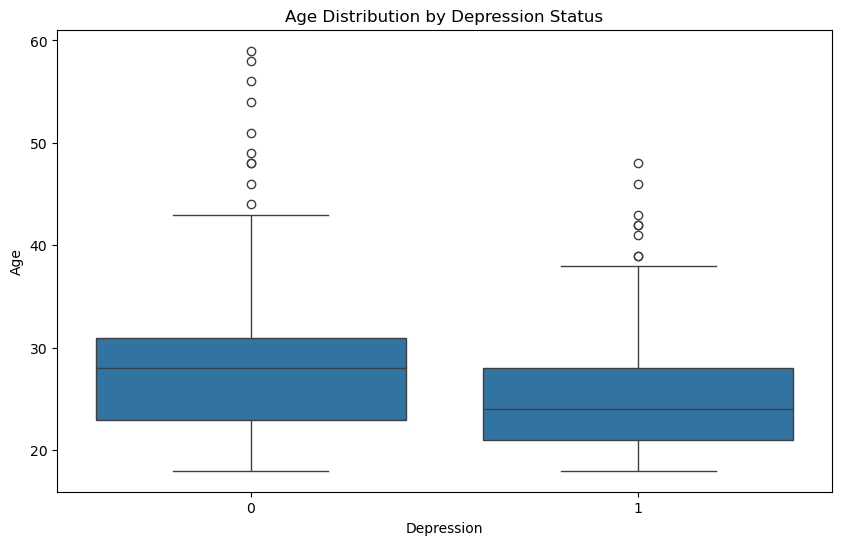

In [58]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For implementing Random Forest classification algorithm
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation metrics

# Create a boxplot to visualize the age distribution by depression status
plt.figure(figsize=(10,6))  # Set the figure size to 10x6 inches
sns.boxplot(x='Depression', y='Age', data=data_file)  # Create boxplot with Depression on x-axis and Age on y-axis
plt.title('Age Distribution by Depression Status')  # Add a title to the plot
plt.show()  # Display the plot

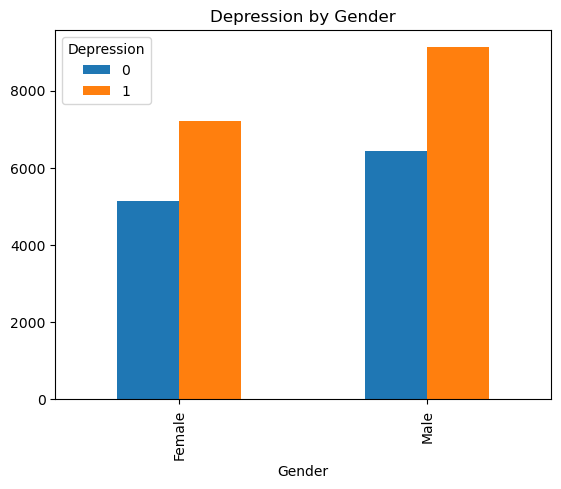

In [68]:
# Create a cross-tabulation of Gender vs Depression and visualize as a bar chart
pd.crosstab(data_file['Gender'], data_file['Depression']).plot(kind='bar')
# Add a descriptive title to the plot
plt.title('Depression by Gender')
# Display the plot
plt.show()

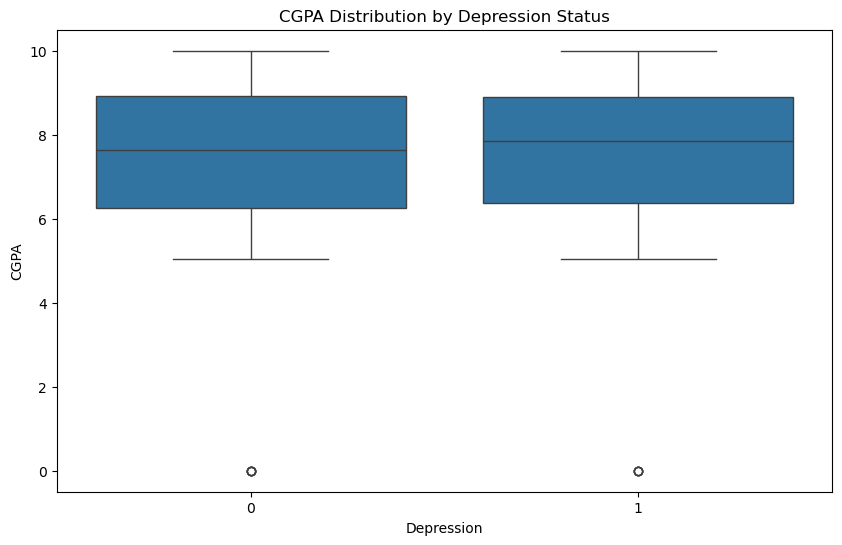

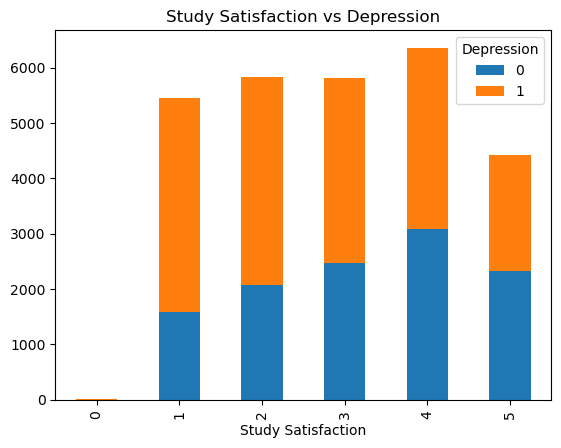

In [72]:
# CGPA vs Depression
plt.figure(figsize=(10,6))
sns.boxplot(x='Depression', y='CGPA', data=data_file)
plt.title('CGPA Distribution by Depression Status')
plt.show()

# Study Satisfaction
pd.crosstab(data_file['Study Satisfaction'], data_file['Depression']).plot(kind='bar', stacked=True)
plt.title('Study Satisfaction vs Depression')
plt.show()

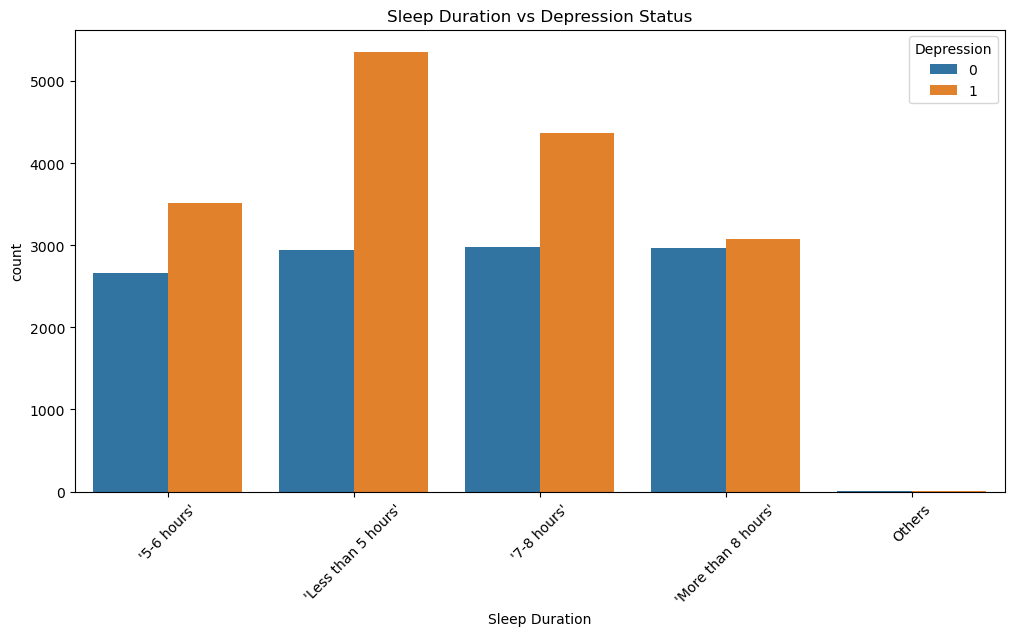

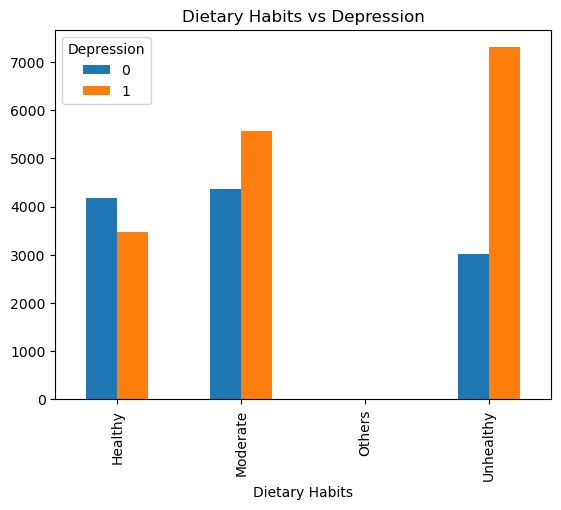

In [76]:
# Sleep Duration analysis
df=data_file
plt.figure(figsize=(12,6))
sns.countplot(x='Sleep Duration', hue='Depression', data=df)
plt.title('Sleep Duration vs Depression Status')
plt.xticks(rotation=45)
plt.show()

# Dietary Habits
pd.crosstab(df['Dietary Habits'], df['Depression']).plot(kind='bar')
plt.title('Dietary Habits vs Depression')
plt.show()

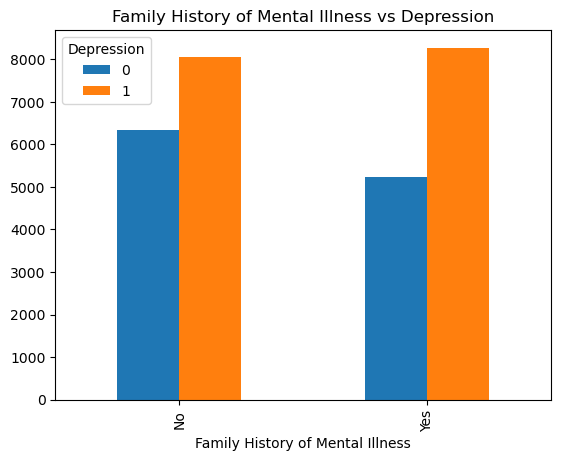

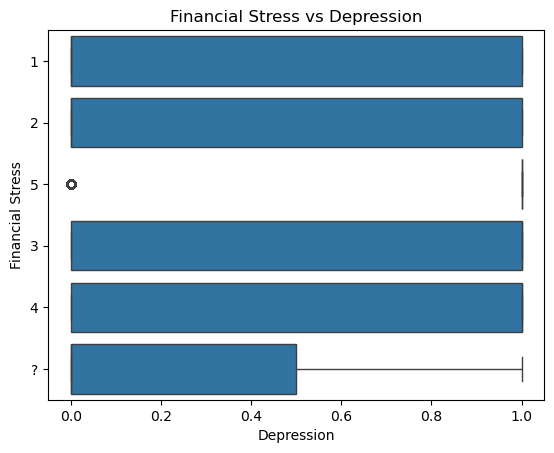

In [82]:
# Family History
pd.crosstab(df['Family History of Mental Illness'], df['Depression']).plot(kind='bar')
plt.title('Family History of Mental Illness vs Depression')
plt.show()

# Financial Stress
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Financial Stress vs Depression')
plt.show()

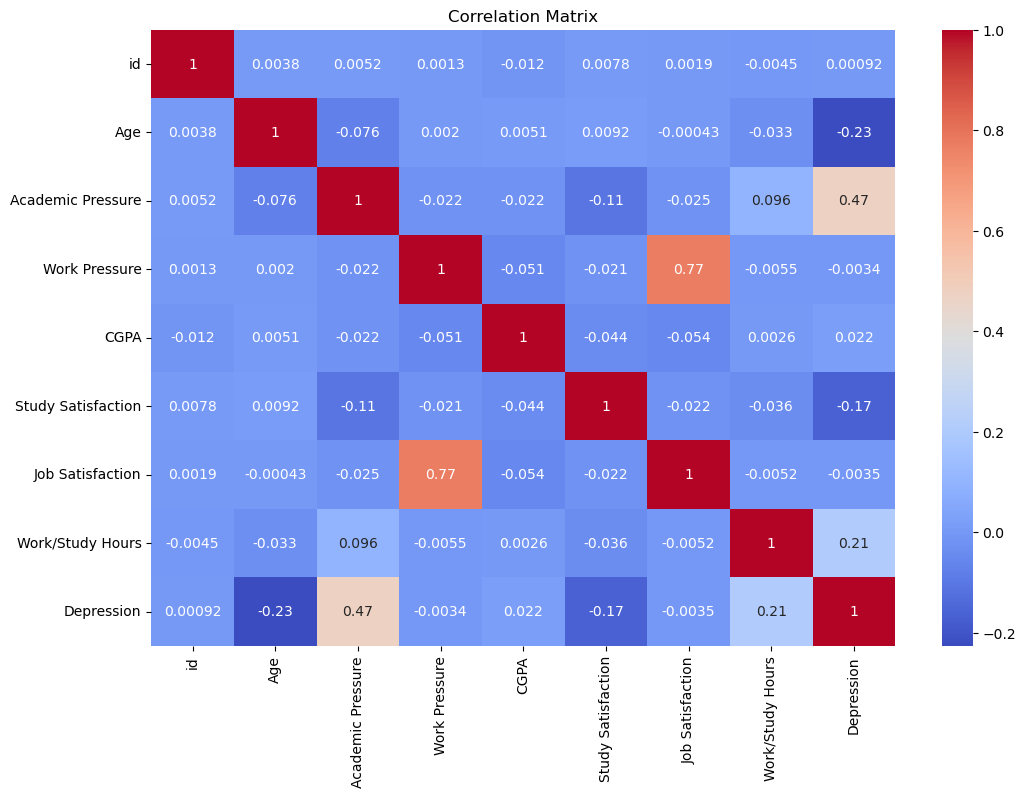

Depression            1.000000
Academic Pressure     0.474835
Work/Study Hours      0.208563
CGPA                  0.022210
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226422
Name: Depression, dtype: float64


In [84]:
# Calculate correlations
corr_matrix = df.corr(numeric_only=True)

# Visualize correlations with depression status
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Top correlations with depression status
print(corr_matrix['Depression'].sort_values(ascending=False))

In [90]:
# Create binary features if needed
df['Insufficient_Sleep'] = df['Sleep Duration'].apply(lambda x: 1 if x in ['Less than 5 hours', '5-6 hours'] else 0)

# Create academic pressure score (example)
df['Academic_Pressure_Score'] = df['Academic Pressure'] + df['Work/Study Hours']/10

In [1]:
# Prepare data for modeling
X = df.drop(['Depression', 'id', 'City'], axis=1)  # Drop identifiers
X = pd.get_dummies(X)  # Convert categorical variables
y = df['Depression']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
plt.title('Top 10 Important Features')
plt.show()

NameError: name 'df' is not defined